In [1]:
import numpy as np

import random
np.random.seed(36)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    f = np.cos(1.5*np.pi*x)
    return f


def f_normal(x):
    f_normal = f(x) + np.random.normal(scale=0.1, size=x.shape)
    return f_normal

In [3]:
x = np.linspace(0, 1, 100)
y = f(x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = f_normal(x_objects)

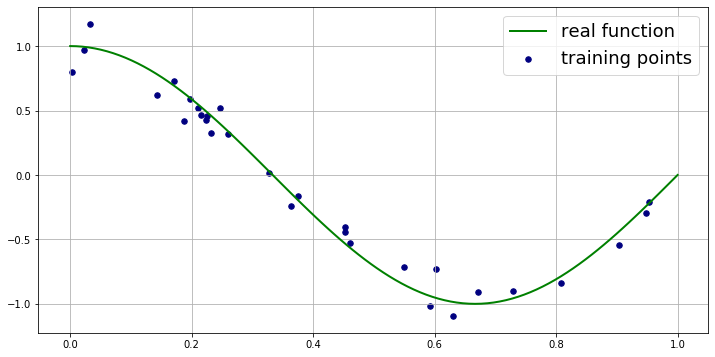

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(x, y, color='green', linewidth=2, label='real function')
plt.scatter(x_objects, y_objects, color='navy', s=30, marker='o', label='training points')

ax.legend(fontsize=18)
ax.grid()

None

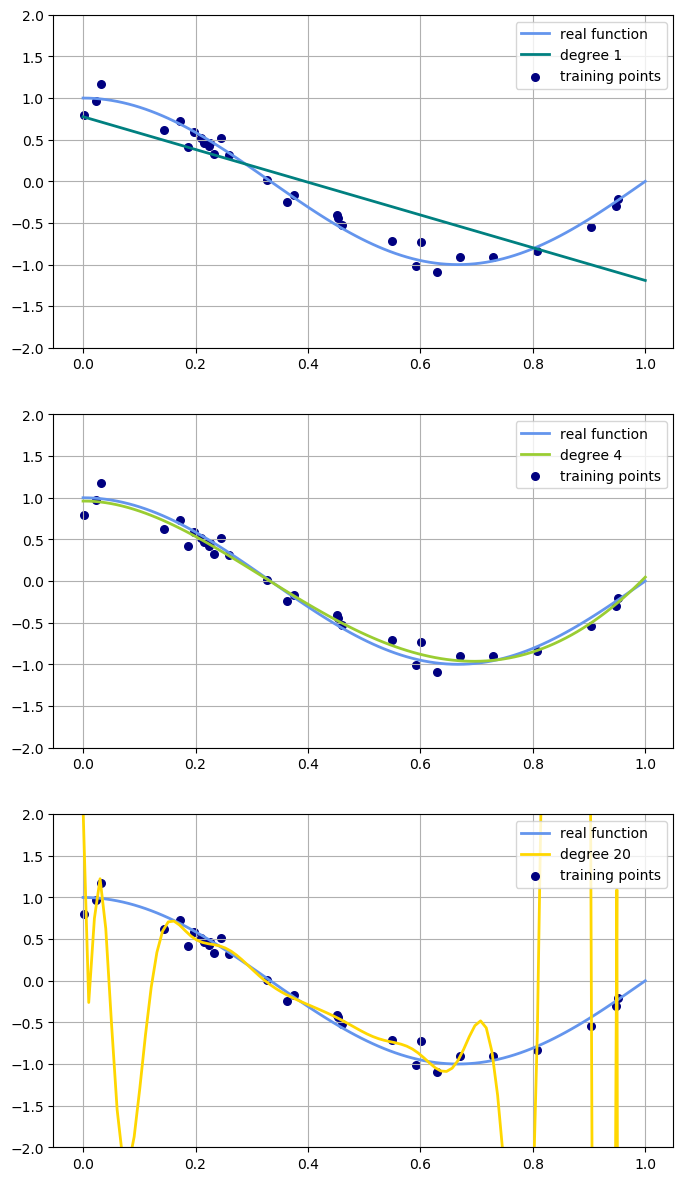

In [5]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

fig, ax = plt.subplots(figsize=(8, 15), nrows=3, dpi=100)

for count, degree in enumerate([1, 4, 20]):
    poly = PolynomialFeatures(degree)
    X_objects = poly.fit_transform(x_objects.reshape(-1, 1))
    X = poly.fit_transform(x.reshape(-1, 1))
    reg = LinearRegression().fit(X_objects, y_objects)
    y_pred = reg.predict(X)
    
    ax[count].plot(x, y, color='cornflowerblue', linewidth=2, label='real function')
    ax[count].scatter(x_objects, y_objects, color='navy', s=30, marker='o', label='training points')
    ax[count].plot(x, y_pred, color=colors[count], linewidth=lw, label="degree %d" % degree)
    
    ax[count].set_ylim(-2, 2)
    ax[count].legend(fontsize=10, loc='upper right')
    ax[count].grid()


None